# OPIM 5894 Lecture 7. Probabilities and Statistics
Jing Peng <br>
UConn School of Business <br>
October 12, 2017 <br>

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import collections
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
# use the code below to make sure plot is shown in Notebook
%matplotlib inline 

## 1. Experiment

In [2]:
# Experiment
np.random.seed(321)
s = np.random.binomial(n=1,p=0.5,size=10)
s

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 1])

In [3]:
collections.Counter(s)

Counter({0: 3, 1: 7})

In [4]:
# Example
np.random.seed(321)
s2 = np.random.binomial(n=5,p=0.8,size=100)
s2

array([3, 5, 2, 5, 3, 4, 3, 3, 5, 4, 4, 5, 4, 5, 3, 4, 5, 5, 3, 4, 4, 5, 5,
       3, 5, 5, 5, 3, 5, 4, 5, 4, 3, 4, 3, 5, 4, 3, 3, 3, 4, 5, 5, 5, 4, 5,
       4, 4, 4, 3, 4, 5, 3, 4, 5, 1, 4, 3, 5, 4, 3, 5, 5, 4, 5, 4, 3, 5, 5,
       3, 4, 4, 4, 4, 3, 4, 4, 3, 4, 4, 4, 3, 5, 5, 4, 5, 4, 4, 3, 5, 3, 3,
       5, 3, 4, 5, 3, 5, 4, 3])

In [5]:
collections.Counter(s2)

Counter({1: 1, 2: 1, 3: 28, 4: 36, 5: 34})

### Exercise: Airline overbook

In [6]:
# book exactly 100 seats over 100K flights
np.random.seed(567)
b1 = np.random.binomial(100,0.9,100000)
b1[:20]

array([92, 85, 84, 91, 82, 92, 86, 88, 89, 90, 90, 85, 89, 90, 86, 93, 91,
       88, 89, 93])

In [7]:
# Frequency of oversell 
collections.Counter(b1<=100)

Counter({True: 100000})

In [8]:
# Book 101 seats over 100K flights
b2 = np.random.binomial(101,0.9,100000)
collections.Counter(b2<=100)

Counter({False: 2, True: 99998})

In [9]:
# Book 105 seats over 100K flights
b3 = np.random.binomial(105,0.9,100000)
collections.Counter(b3<=100)

Counter({False: 1670, True: 98330})

## 2. Binomial Distribution

In [10]:
# Compute probability of observing 2 heads in 4 trials (pr.head=0.7) using mathematical formula
from scipy.special import comb
def bin(n, N, p):
    return comb(n,N)*(p**N)*((1-p)**(n-N))
bin(4,2,0.7)

0.2646

In [11]:
# Using the built-in probability mass function
scipy.stats.binom.pmf(2,4,0.7)

0.26460000000000006

In [12]:
# Compute probability using simulations
s3 = np.random.binomial(4,0.7, 10000)
collections.Counter(s3)

Counter({0: 95, 1: 752, 2: 2599, 3: 4117, 4: 2437})

In [13]:
collections.Counter(s3)[2]

2599

## 3. Normal Distribution

In [14]:
scipy.stats.norm(5,2).cdf(6)

0.69146246127401312

In [15]:
1 - scipy.stats.norm(5,2).cdf(4)

0.69146246127401312

In [16]:
scipy.stats.norm(5,2).cdf(4) + (1-scipy.stats.norm(5,2).cdf(6))

0.61707507745197376

## 4. Normal vs. Logistic with Identical Mean and Variance

### 4.1 Simulations

In [17]:
z1 = np.random.normal(0,1,100000)
z2 = np.random.logistic(loc=0, scale=np.sqrt(3)/np.pi, size=100000)

In [18]:
[np.mean(z1), np.mean(z2)]

[-0.0022548748147658403, 0.0028243537342565808]

In [19]:
[np.std(z1), np.std(z2)]

[1.0024229073104305, 0.99520479855383392]

In [20]:
collections.Counter(z1<-3)

Counter({False: 99862, True: 138})

In [21]:
collections.Counter(z2<-3)

Counter({False: 99594, True: 406})

### 4.2 PDF Formula

In [22]:
# Create a random variable and a logistic variable
a = scipy.stats.norm(loc=0,scale=1)
b = scipy.stats.logistic(loc=0,scale=np.sqrt(3)/np.pi)

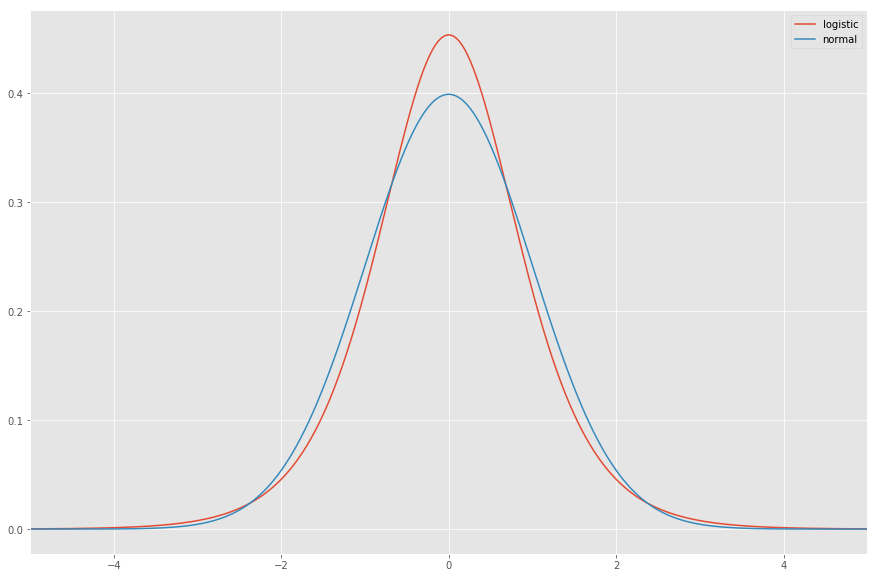

In [23]:
x = np.linspace(-5,5,10000)
y1 = a.pdf(x)
y2 = b.pdf(x)
df = pd.DataFrame({'normal':y1, 'logistic':y2}, index=x)
df.plot(figsize=(15,10))

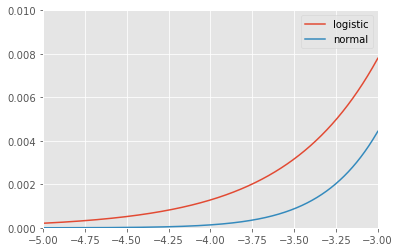

In [24]:
# zoom in
df.plot(xlim=[-5,-3], ylim=[0,0.01])

### 4.3 Using CDF Formula

In [25]:
# Using CDF
scipy.stats.norm.cdf(-3)

0.0013498980316300933

In [26]:
a.cdf(-3)

0.0013498980316300933

In [27]:
scipy.stats.logistic(loc=0, scale=np.sqrt(3)/np.pi).cdf(-3)

0.0043147230008364111

In [28]:
b.cdf(-3)

0.0043147230008364111

### Exercise: plot CDF of normal vs. logistic over [-5,5]

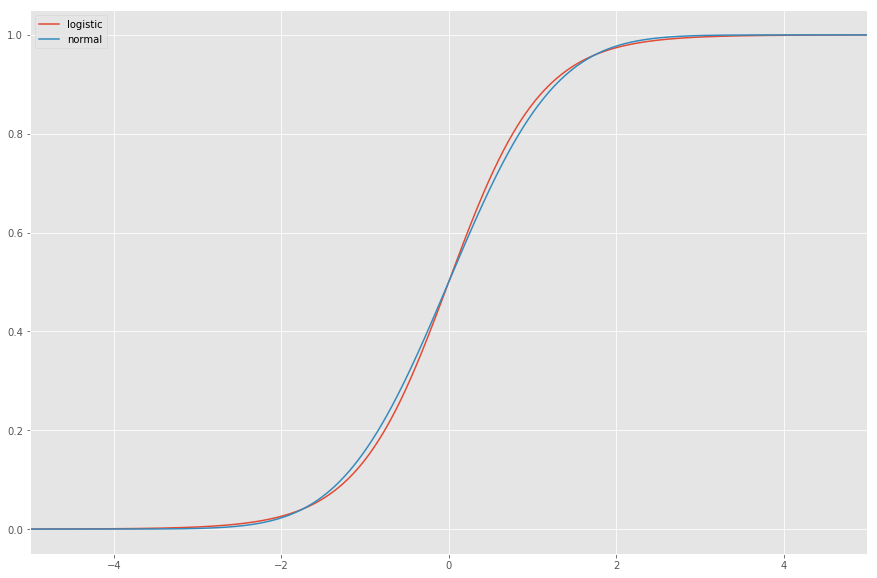

In [29]:
x = np.linspace(-5,5,10000)
y1 = a.cdf(x)
y2 = b.cdf(x)
df = pd.DataFrame({'normal':y1, 'logistic':y2}, index=x)
df.plot(figsize=(15,10))

In [30]:
# range of support fall between [0.2, 0.8]
# ppf: inverse cdf
a.ppf(0.8) - a.ppf(0.2)

1.6832424671458286

In [31]:
a.ppf(0.2)

-0.84162123357291418

In [32]:
b.ppf(0.8) - b.ppf(0.2)

1.5286082776913767

## 5. Joint Distributions

In [33]:
# Generate two bivariate normally distributed random variables with a correlation of 0.5
mean = [0, 0]
cov = [[1, 0.5], [0.5, 1]]
x, y = np.random.multivariate_normal(mean, cov, 5000).T

In [34]:
x

array([ 0.41813953,  0.28024982, -0.21968155, ...,  0.28340531,
        1.2043501 ,  1.72796173])

In [35]:
y

array([ 0.62037547,  0.7509005 ,  1.47424387, ..., -0.62867649,
        3.06941174, -0.90771376])

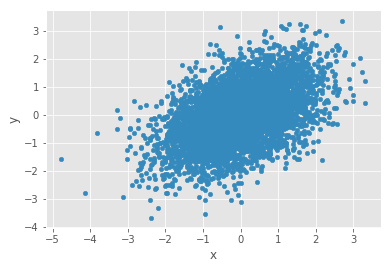

In [36]:
df = pd.DataFrame({'x':x, 'y':y})
df.plot.scatter(x='x', y='y')

### 5.4 Exercise: Distributions of Y vs. Y|X>1

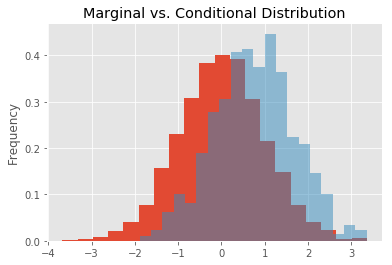

In [37]:
# Compare Marginal and Conditional Density (Y|X>1) in a Superimposed Graph
# Plot with Pandas
ax = df.y.plot.hist(title='Marginal vs. Conditional Distribution', bins=20, normed=True)
df2 = df[df.x>1]
df2['y'].plot.hist(ax=ax, bins=20, alpha=0.5, normed=True)

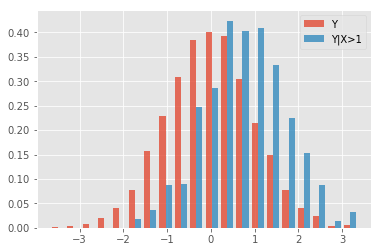

In [38]:
# Plot with matplotlib directly
plt.hist([y, y[x>1]], alpha=0.8, bins=20, normed=True, label=['Y', 'Y|X>1'])
plt.legend(loc='upper right')

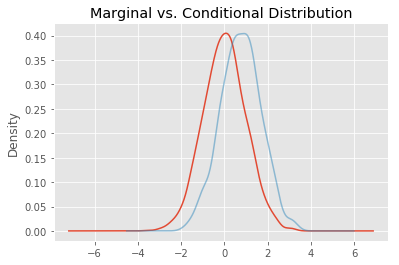

In [39]:
# Kernal Density Estimation
ax = df.y.plot.kde(title='Marginal vs. Conditional Distribution')
df2 = df[df.x>1]
df2['y'].plot.kde(ax=ax,alpha=0.5)

## 6. Measures of Random Variables

### 6.1 Joint Normal Distribution

In [40]:
# Generate two bivariate normally distributed random variables with a correlation of 0.5
np.random.seed(100)
mean = [0, 0]
cov = [[1, 0.5], [0.5, 1]]
x, y = np.random.multivariate_normal(mean, cov, 5000).T

In [41]:
# Compute the mean, std, skewnewss, and Kurtosis of x
[np.mean(x), np.std(x), scipy.stats.skew(x), scipy.stats.kurtosis(x)]

[-0.0049008001253394579,
 1.0062946680461187,
 -0.026458565818195848,
 0.08890570092202044]

In [42]:
scipy.stats.kurtosis(x, fisher=False)

3.0889057009220204

In [43]:
# Covariance
np.cov(x,y)

array([[ 1.01283153,  0.50644152],
       [ 0.50644152,  1.0127383 ]])

In [44]:
# Theoretical values
mean, var, skew, kurt = scipy.stats.norm.stats(0, 1, moments='mvsk')
mean, var, skew, kurt

(array(0.0), array(1.0), array(0.0), array(0.0))

### 6.2 Exercise: Negative Binomial Distribution

In [45]:
np.random.seed(200)
z = np.random.negative_binomial(n=5, p=0.3, size=10000)

(array([  2.85000000e+02,   1.26500000e+03,   1.24600000e+03,
          2.09600000e+03,   1.25100000e+03,   1.49000000e+03,
          7.02000000e+02,   7.02000000e+02,   3.21000000e+02,
          3.20000000e+02,   1.65000000e+02,   5.70000000e+01,
          5.40000000e+01,   1.70000000e+01,   1.70000000e+01,
          4.00000000e+00,   2.00000000e+00,   2.00000000e+00,
          3.00000000e+00,   1.00000000e+00]),
 array([  0.  ,   2.55,   5.1 ,   7.65,  10.2 ,  12.75,  15.3 ,  17.85,
         20.4 ,  22.95,  25.5 ,  28.05,  30.6 ,  33.15,  35.7 ,  38.25,
         40.8 ,  43.35,  45.9 ,  48.45,  51.  ]),
 <a list of 20 Patch objects>)

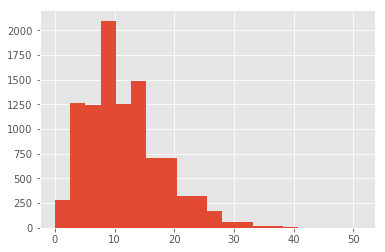

In [46]:
# Plot the histogram of z
plt.hist(z, bins=20)

In [47]:
# Compute the mean, std, skewnewss, and Kurtosis of z
[np.mean(z), np.std(z), scipy.stats.skew(z), scipy.stats.kurtosis(z)]

[11.673500000000001, 6.3236775494960211, 0.9548196605579761, 1.348715434013653]

In [48]:
# Theoretical values
scipy.stats.nbinom.stats(5,0.3, moments='mvsk')

(array(11.666666666666668),
 array(38.88888888888889),
 array(0.9086882225022429),
 array(1.2257142857142858))

In [49]:
np.sqrt(38.88888888888889)

6.2360956446232363

In [50]:
# To get consistent results with formula on wikipedia
p = 0.7 # instead of p=0.3
p*5/(1-p)

11.666666666666664

## Compute PI using simulations

In [51]:
x = np.random.uniform(low=-1, high=1, size=100000)
y = np.random.uniform(low=-1, high=1, size=100000)

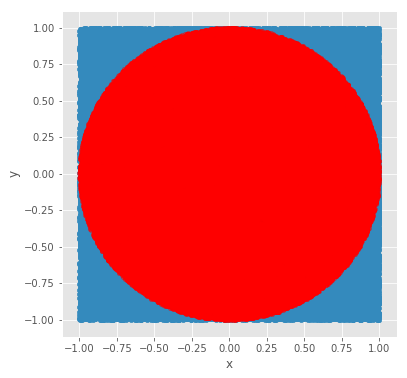

In [56]:
df = pd.DataFrame({'x':x, 'y':y})
ax = df.plot.scatter(x='x', y='y', figsize=(6,6))
df[x**2+y**2<=1].plot.scatter(x='x', y='y', color='r', alpha=0.5, ax=ax)

In [53]:
# The ratio of points fall in the red unit circle should be the same as the ratio of the areas of the circle vs. square (pi/4)
ratio = np.mean(x**2+y**2<=1)
pi = ratio*4
pi

3.1462400000000001